# Coloc
This notebook take a list of rds output from susie_rss and a list of rds output from uni_susie to conduct coloc on them.

## Input 
1. A list of output from the susie_rss module, whose file name **must** ends with the pattern `.chr17_60570445_65149278.unisusie_rss.fit.rds`
2. A list of output from the susie module, whose file name **must** ends with the pattern `.ENSG00000120063.unisusie.fit.rds`
3. A region_list, with the columns "#chr", "start", "end" and "gene_id". The numbers in #chr columns require to have "chr" prefix.

The module will transform all the input 1 into following table:
```
        ss_path #chr    ss_from ss_to
output/ADGWAS2022.chr17.sumstat.chr17_1013206_2799513.unisusie_rss.fit.rds      chr17   1013206 2799513
output/ADGWAS2022.chr17.sumstat.chr17_10670471_12764265.unisusie_rss.fit.rds    chr17   10670471        12764265
output/ADGWAS2022.chr17.sumstat.chr17_120360_1013206.unisusie_rss.fit.rds       chr17   120360  1013206
output/ADGWAS2022.chr17.sumstat.chr17_12764265_13625781.unisusie_rss.fit.rds    chr17   12764265        13625781
output/ADGWAS2022.chr17.sumstat.chr17_13625781_14744159.unisusie_rss.fit.rds    chr17   13625781        14744159
output/ADGWAS2022.chr17.sumstat.chr17_14744159_16989527.unisusie_rss.fit.rds    chr17   14744159        16989527
output/ADGWAS2022.chr17.sumstat.chr17_16989527_20940244.unisusie_rss.fit.rds    chr17   16989527        20940244
output/ADGWAS2022.chr17.sumstat.chr17_60570445_65149278.unisusie_rss.fit.rds    chr17   60570445        65149278

```
and input 2 into following table: 
```
        qtl_path        gene_id
/mnt/.../cache/demo.ENSG00000000419.unisusie.fit.rds      ENSG00000000419
/mnt/.../cache/demo.ENSG00000000457.unisusie.fit.rds      ENSG00000000457
/mnt/.../cache/demo.ENSG00000000938.unisusie.fit.rds      ENSG00000000938
/mnt/.../cache/demo.ENSG00000000971.unisusie.fit.rds      ENSG00000000971
/mnt/.../cache/demo.ENSG00000001036.unisusie.fit.rds      ENSG00000001036
/mnt/.../cache/demo.ENSG00000001084.unisusie.fit.rds      ENSG00000001084
/mnt/.../cache/demo.ENSG00000001167.unisusie.fit.rds      ENSG00000001167
/mnt/.../cache/demo.ENSG00000001460.unisusie.fit.rds      ENSG00000001460
/mnt/.../cache/demo.ENSG00000001461.unisusie.fit.rds      ENSG00000001461

```
Under the hood, the two table will be merged together using input 3 to produce:
```
        #chr    start   end     gene_id ss_from ss_to      qtl_path                                ss_path 
chr17   181649  181650  ENSG00000272636  120360  1013206  /mnt/.../cache/demo.E...unisusie.fit.rds output/ADGW...unisusie_rss.fit.rds     
chr17   191586  191587  ENSG00000273172  120360  1013206  /mnt/.../cache/demo.E...unisusie.fit.rds output/ADGW...unisusie_rss.fit.rds     
chr17   331204  331205  ENSG00000262061  120360  1013206  /mnt/.../cache/demo.E...unisusie.fit.rds output/ADGW...unisusie_rss.fit.rds     
chr17   386253  386254  ENSG00000181031  120360  1013206  /mnt/.../cache/demo.E...unisusie.fit.rds output/ADGW...unisusie_rss.fit.rds     
chr17   410324  410325  ENSG00000187624  120360  1013206  /mnt/.../cache/demo.E...unisusie.fit.rds output/ADGW...unisusie_rss.fit.rds     
chr17   445938  445939  ENSG00000183688  120360  1013206  /mnt/.../cache/demo.E...unisusie.fit.rds output/ADGW...unisusie_rss.fit.rds     
chr17   657546  657547  ENSG00000244097  120360  1013206  /mnt/.../cache/demo.E...unisusie.fit.rds output/ADGW...unisusie_rss.fit.rds     

```

Only the rows where the TSS of a gene is within the LD region that the summary stats are fine-mapped on will be retained.

## Output:
1. A rds object containing the output of the coloc function. When there is no overlap snps/when there is no snps in the cs of the eqtl, the coloc function will retun a NA object.

2. If 1 is not NA, a summary table summarizing the coloc signals will be saved. 
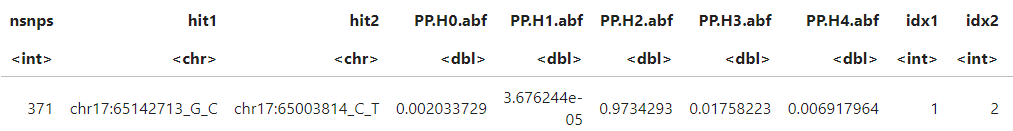

The `nsnps` columns stands for the number of snps shared by the qtl susie and the gwas susie.

The `PP.\*.abf` columns stands for the probability that following global hypothesis are not rejected. 

- H0: no association with either trait in the region
- H1: association with trait 1 only
- H2: association with trait 2 only
- H3: both traits are associated, but have different single causal variants
- H4: both traits are associated and share the same single causal variant

Please see [this paper](https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1009440) for details.

### MWE

In [ ]:
sos run pipeline/coloc.ipynb coloc \
    --qtl_rds `ls /mnt/vast/hpc/csg/molecular_phenotype_calling/eqtl/output/susie_per_gene_tad_3/cache/*rds`   \
    --sumstat_rds `ls output/*rds` \
    --region_list test.region_list 

In [3]:
[global]
parameter: container = ""
# For cluster jobs, number commands to run per job
parameter: job_size = 1
# Wall clock time expected
parameter: walltime = "5h"
# Memory expected
parameter: mem = "16G"
# Number of threads
parameter: numThreads = 20
parameter: cwd = path("output")
# Get the susie_rss results
parameter: sumstat_rds = paths
# Get the susie results
parameter: qtl_rds = paths
# A region_list to link the qtl results and the rss results
parameter: region_list
# if using a fix windows, specify the cis windows use
parameter: windows = 0
import pandas as pd

sumstat_list = pd.DataFrame({"ss_path" : [str(x) for x in sumstat_rds]})
sumstat_list["#chr"] = [f'chr{x.split(".")[-4].split("_")[0].replace("chr","")}'  for x in sumstat_list.ss_path ] ## Add chr if there is no chr prefix. This is to accomodata chr XY and M
sumstat_list["ss_from"] = [int(x.split(".")[-4].split("_")[1])  for x in sumstat_list.ss_path ]
sumstat_list["ss_to"] = [int(x.split(".")[-4].split("_")[2])  for x in sumstat_list.ss_path ]

qtl_list = pd.DataFrame({"qtl_path" : [str(x) for x in qtl_rds], "gene_id" : [str(x).split(".")[-4] for x in qtl_rds] })

region_list = pd.read_csv(region_list,"\t").merge(qtl_list, on = "gene_id").merge(sumstat_list , on = "#chr")

## Only changes the regions if the region is TSS format
if region_list["start"][0] - region_list["end"][0] == -1:
        if windows != 0:
            region_list["start"] = region_list["start"] - windows
            region_list["end"] = region_list["start"] + windows
        else: 
            print("No padding of non-overhang region for rolling cis windows")


input_list = region_list[["ss_path","qtl_path"]].values.tolist()
region_list = region_list.to_dict("records")

SyntaxError: invalid syntax (3373411917.py, line 1)

In [1]:
[coloc]
input: input_list, group_by = 2,group_with = "region_list"
output: f'{cwd}/{_input[0]:bnnn}.{_input[1]:bnnn}.coloc.rds'
task: trunk_workers = 1, trunk_size = job_size, walltime = walltime, mem = mem, cores = numThreads, tags = f'{step_name}_{_output[1]:bn}'
R: expand = '${ }', stdout = f"{_output:nn}.stdout", stderr = f"{_output:nn}.stderr", container = container
    library(coloc)
    library(dplyr)
    library(stringr)
    library(readr)
    library(purrr)
    
    lbf_mtx_spliting = function(df){
    list_bf = map(unique(df$names), ~df%>%filter(names == .x ))
    list_bf = map(list_bf,~.x%>%select(snps,ifelse(str_split(.x$cs_index[1],",")[[1]]!="0",str_split(.x$cs_index[1],",")[[1]] ,"snps" )))
    new_bf = bind_rows(list_bf)%>%replace(is.na(.), 0)
    new_bf = new_bf %>%select(-snps)%>%t%>%`colnames<-`(new_bf$snps)
    return(new_bf)                           
                               }
    
    gwas <- read_delim(file = "${_input[0]}")
    qtl <- read_delim(file = "${_input[1]}")
    ## Match the variants
    intersct = intersect(gwas$snps, qtl$snps)
    message("Using ", length(intersect), "/ ", nrow(qtl), 
        " and ", nrow(gwas), " available")
    gwas_bf = gwas%>%filter(snps %in% intersct )%>%lbf_mtx_spliting()
    qtl_bf = qtl%>%filter(snps %in% intersct )%>%lbf_mtx_spliting()
    
    coloc_result <- coloc.bf_bf(bf1=gwas, bf2=qtl)
    coloc_result$summary = coloc_result$summary%>%mutate("qtl_region" = paste0(unique(qtl$names),",") ,
                                       "gwas_region" = paste0(unique(gwas$names),",") ,
                                       "qtl_files" = "${_input[1]}" ,"gwas_files" = "${_input[0]:a}" )
    coloc_result$summary%>%readr::write_delim("${_output:n}.summary.tsv")}
    coloc_result%>%saveRDS("${_output}")

SyntaxError: invalid syntax (1234151111.py, line 2)